## Use the attached banking_churn dataset to create a machine learning model that predicts customer churn. This should involve everything we've covered so far from EDA, Data Preprocessing, creating and saving the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer, RobustScaler

In [2]:
bank_data = pd.read_csv("banking_churn.csv")

In [3]:
#view the first 5 rows of the dataset
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#view the shape of the dataset. it has 14 columns/variables and 10000 rows/observations
bank_data.shape

(10000, 14)

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Drop rows that will not be needed - row number, customer id, surname
bank_data = bank_data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [7]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# check for missing values in the bank_data set. Notice no null value in any of the columns
bank_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
bank_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
# check distribution of target variable exited (1 = Yes, 0 = No )
bank_data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

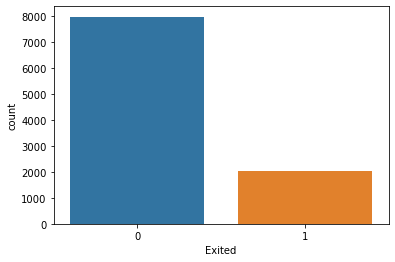

In [11]:
# plot the categorical variable Exited
sns.countplot(x="Exited", data = bank_data)

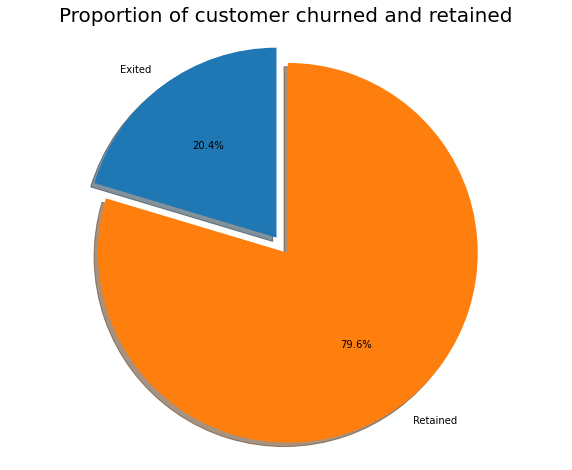

In [12]:
#pie plot for the Exited column
labels = 'Exited', 'Retained'
sizes = [bank_data.Exited[bank_data['Exited']==1].count(), bank_data.Exited[bank_data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

### 20.4% of customers have exited.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

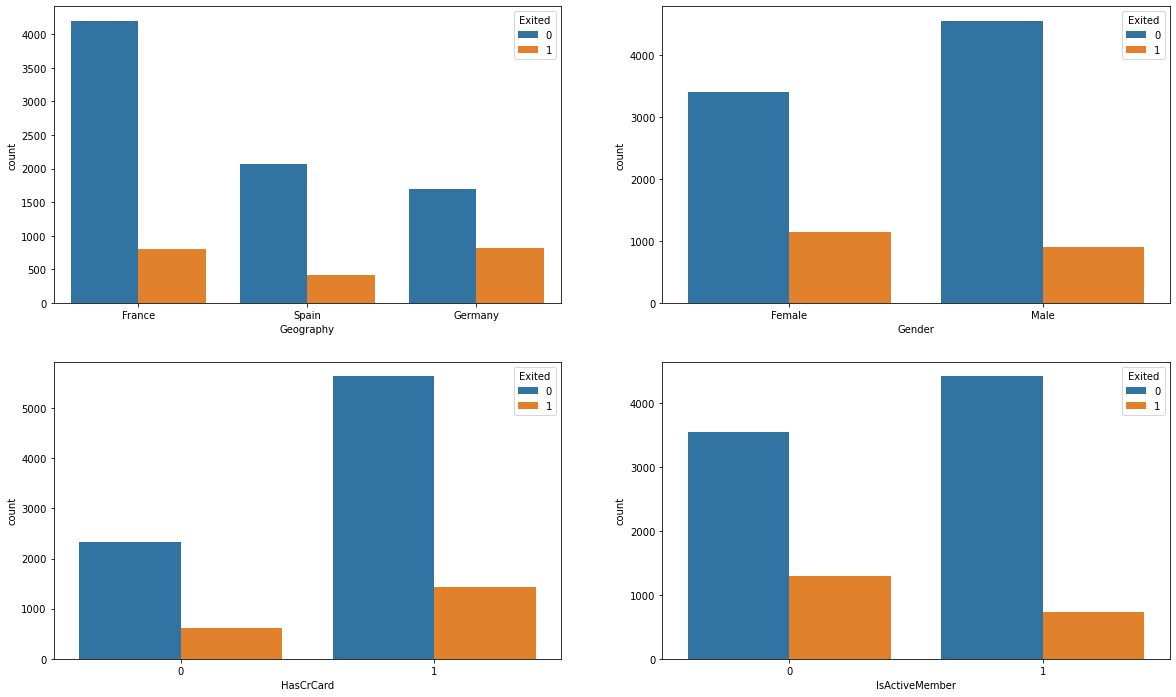

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = bank_data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = bank_data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = bank_data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = bank_data, ax=axarr[1][1])

<AxesSubplot:>

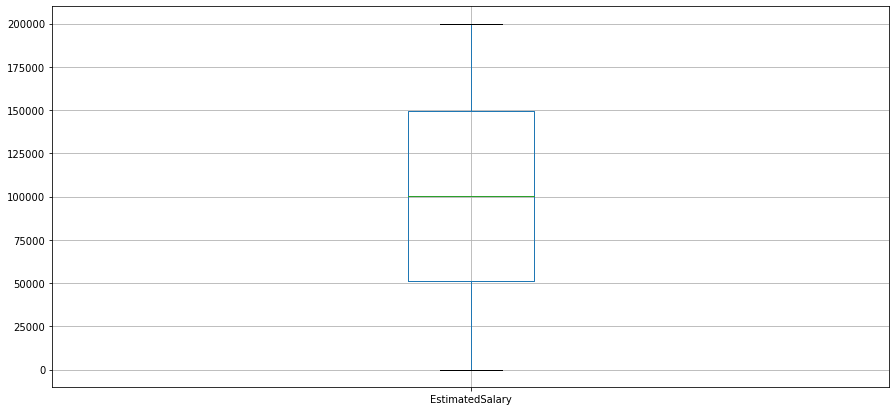

In [14]:
bank_data.boxplot("EstimatedSalary", figsize=(15,7))

<AxesSubplot:>

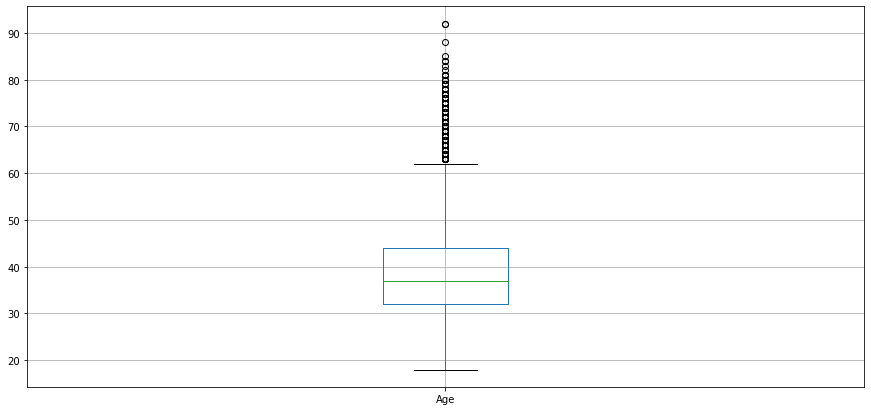

In [15]:
bank_data.boxplot("Age", figsize=(15,7))

<AxesSubplot:>

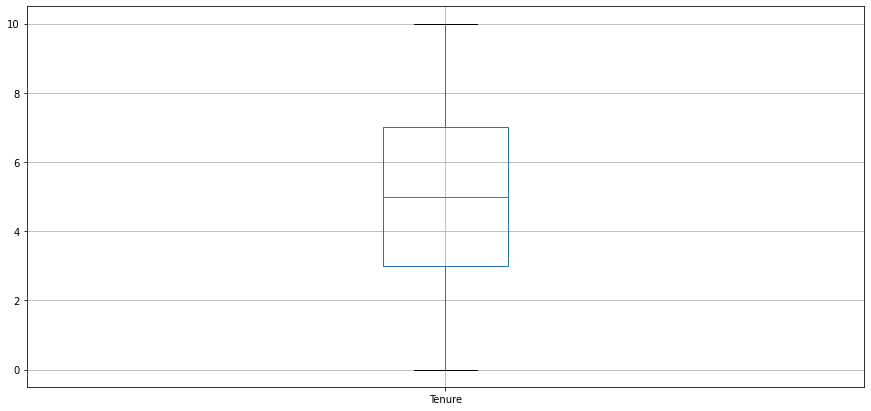

In [16]:
bank_data.boxplot("Tenure", figsize=(15,7))

In [17]:
pd.crosstab(bank_data['IsActiveMember'], bank_data['Exited'])

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


#### correlation

In [44]:
bank_data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.008928,0.005538,0.004780,0.002857,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.039208,0.046897,-0.001685,0.027544,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.002848,-0.000567,0.003868,-0.014733,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,-0.231329,0.401110,-0.134892,-0.012087,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.001230,-0.010419,0.009039,0.021859,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.002467,0.010577,-0.013480,-0.005766,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.003317,-0.020486,0.016732,-0.022544,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.003332,0.010297,-0.006482,0.008112,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.104955,0.173488,-0.052667,0.106512,-0.106512
Geography_France,-0.008928,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,-0.104955,1.000000,-0.580359,-0.575418,-0.006772,0.006772


## one hot encode categorical variables

In [18]:
bank_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
bank_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
bank_data = pd.get_dummies(bank_data, columns =["Geography", "Gender"], drop_first = False)

In [21]:
bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


### scaling the data - using minVec maxVec

In [22]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cat_vars = ['HasCrCard', 'IsActiveMember']

minVec = bank_data[continuous_vars].min().copy()
maxVec = bank_data[continuous_vars].max().copy()
bank_data[continuous_vars] = (bank_data[continuous_vars]-minVec)/(maxVec-minVec)


In [23]:
bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


### split Train and Test data

In [24]:
from sklearn.model_selection import train_test_split

X=bank_data[['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary','Geography_France', 'Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']]  # Features
y=bank_data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3215,0.752,0.189189,0.8,0.000000,0.333333,0,0,0.925409,1,0,0,1,0
9659,0.942,0.324324,0.3,0.349972,0.333333,1,1,0.323042,0,1,0,0,1
3137,0.628,0.405405,1.0,0.000000,0.000000,1,0,0.700875,1,0,0,0,1
7861,0.514,0.135135,0.1,0.541798,0.333333,1,1,0.552796,0,0,1,0,1
8749,0.666,0.391892,0.1,0.000000,0.333333,1,0,0.744959,1,0,0,0,1


In [26]:
X_train.loc[X_train.HasCrCard == 0, 'HasCrCard'] = -1
X_train.loc[X_train.IsActiveMember == 0, 'IsActiveMember'] = -1
X_train.head()

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3215,0.752,0.189189,0.8,0.000000,0.333333,-1,-1,0.925409,1,0,0,1,0
9659,0.942,0.324324,0.3,0.349972,0.333333,1,1,0.323042,0,1,0,0,1
3137,0.628,0.405405,1.0,0.000000,0.000000,1,-1,0.700875,1,0,0,0,1
7861,0.514,0.135135,0.1,0.541798,0.333333,1,1,0.552796,0,0,1,0,1
8749,0.666,0.391892,0.1,0.000000,0.333333,1,-1,0.744959,1,0,0,0,1


### Random forests for classification and regression

In [27]:
from sklearn.ensemble import RandomForestClassifier


In [28]:
rand = RandomForestClassifier(n_estimators = 100)
rand.fit(X_train, y_train)
pred = rand.predict(X_test)

In [29]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8605


### Training the model

In [30]:
rand.fit(X_train,y_train)

RandomForestClassifier()

### Check feature importances

In [31]:
feature_imp = pd.DataFrame(
    {"feature": list(X.columns), "importance": rand.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_imp

,feature,importance
1,Age,0.238529
7,EstimatedSalary,0.144631
0,CreditScore,0.143121
3,Balance,0.140491
4,NumOfProducts,0.133817
2,Tenure,0.083792
6,IsActiveMember,0.039118
9,Geography_Germany,0.021198
5,HasCrCard,0.018137
8,Geography_France,0.010263


### Visualize feature importance

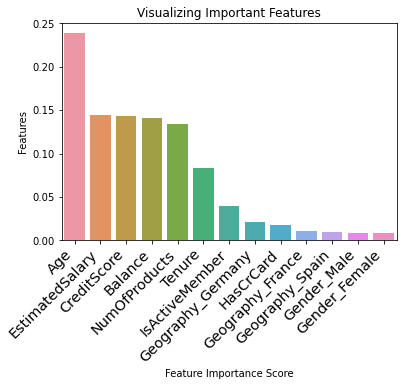

In [32]:
# Creating a bar plot
sns.barplot(x=feature_imp.feature, y=feature_imp.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

#### from the above visualization, it can be deduced that Gender_Male, Gender_Female, Geography_ features have very low importance and do not contribute much to the Prediction. we will remove some features train and test the accuracy again

In [33]:
bank_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


In [34]:
bank_data_new = bank_data.drop(["Gender_Female", "Gender_Male"], axis=1)

In [35]:
bank_data_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [36]:
X=bank_data_new[['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard','IsActiveMember','EstimatedSalary','Geography_France', 'Geography_Germany','Geography_Spain']]  # Features
y=bank_data_new['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train.loc[X_train.HasCrCard == 0, 'HasCrCard'] = -1
X_train.loc[X_train.IsActiveMember == 0, 'IsActiveMember'] = -1
X_train.head()

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
8444,0.884,0.702703,0.3,0.000000,0.333333,1,1,0.861226,1,0,0
6045,0.398,0.256757,0.1,0.520619,0.333333,1,1,0.642503,0,1,0
2294,0.482,0.202703,0.9,0.525176,0.000000,1,-1,0.593909,1,0,0
2004,0.668,0.148649,0.8,0.507257,0.000000,-1,1,0.397455,0,1,0
2770,0.652,0.189189,0.5,0.000000,0.333333,1,1,0.377305,1,0,0


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rand = RandomForestClassifier(n_estimators = 100)
rand.fit(X_train, y_train)
pred = rand.predict(X_test)

In [40]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.861


#### Accuracy has increased from 86% to 87%

In [41]:
rand.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
feature_imp = pd.DataFrame(
    {"feature": list(X.columns), "importance": rand.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_imp

,feature,importance
1,Age,0.239853
7,EstimatedSalary,0.154262
0,CreditScore,0.150244
3,Balance,0.146317
4,NumOfProducts,0.129691
2,Tenure,0.082864
6,IsActiveMember,0.039408
5,HasCrCard,0.019158
9,Geography_Germany,0.018770
8,Geography_France,0.009821


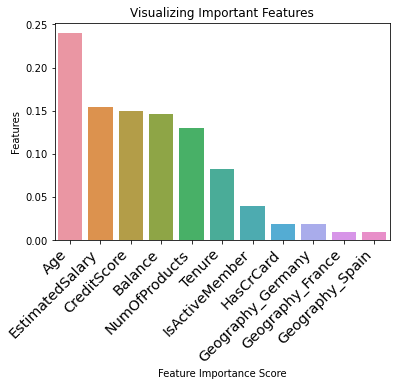

In [43]:
# Creating a bar plot
sns.barplot(x=feature_imp.feature, y=feature_imp.importance)
# Add labels to your

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()